In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold 
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout,MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import logging
import time
import tensorflow as tf 
import gc 

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

 # Load dataset

In [ ]:
data = pd.read_csv("C:/Class/HK6/IPrj/Datasets/Leukemia_GSE28497.csv")
data

samples                   type  1007_s_at   1053_at    117_at  \
0    GSM705467.CEL.gz             B-CELL_ALL   7.409521  5.009216  4.173607   
1    GSM705468.CEL.gz             B-CELL_ALL   7.177109  5.415108  4.426778   
2    GSM705469.CEL.gz             B-CELL_ALL   6.564918  5.248020  4.252414   
3    GSM705470.CEL.gz             B-CELL_ALL   6.872028  5.155963  4.388849   
4    GSM705471.CEL.gz             B-CELL_ALL   7.402105  5.509826  4.284291   
..                ...                    ...        ...       ...       ...   
276  GSM706002.CEL.gz  B-CELL_ALL_ETV6-RUNX1   6.692887  4.736595  4.503892   
277  GSM706003.CEL.gz  B-CELL_ALL_ETV6-RUNX1   6.209500  4.566413  4.637307   
278  GSM706004.CEL.gz  B-CELL_ALL_ETV6-RUNX1   6.046964  5.252467  4.420044   
279  GSM706005.CEL.gz  B-CELL_ALL_ETV6-RUNX1   6.347403  4.903981  4.281019   
280  GSM706007.CEL.gz  B-CELL_ALL_ETV6-RUNX1   6.687363  5.136351  4.182961   

       121_at  1255_g_at   1294_at   1316_at   1320_at  ...  \
0    7.315369   3.185411  7.620644  3.731541  3.471587  ...   
1    7.550818   3.134181  7.685723  3.907953  3.650995  ...   
2    7.175169   3.017718  7.956261  3.354557  3.302989  ...   
3    7.365933   3.031735  7.830002  3.508926  3.412491  ...   
4    7.214947   2.925269  7.789838  3.610425  3.362593  ...   
..        ...        ...       ...       ...       ...  ...   
276  7.484208   3.137376  7.917993  3.858845  3.341846  ...   
277  7.348777   3.018984  6.423441  3.669993  3.406887  ...   
278  7.086734   2.913081  7.723025  3.474380  3.309239  ...   
279  6.989415   2.968945  7.618195  3.492828  3.266248  ...   
280  6.969701   3.006955  8.051688  3.558775  3.378041  ...   

     AFFX-r2-Hs28SrRNA-5_at  AFFX-r2-Hs28SrRNA-M_at  AFFX-r2-P1-cre-3_at  \
0                  2.968822                3.223820            11.968681   
1                  2.982888                3.690411            12.318004   
2                  2.897425                3.611584            11.748222   
3                  3.024722                3.713087            12.208588   
4                  3.259802                4.096010            11.641305   
..                      ...                     ...                  ...   
276                3.215936                3.801296            12.292519   
277                3.266234                3.873540            11.971540   
278                3.150403                3.756845            11.977577   
279                3.204594                3.918882            11.936382   
280                3.498566                3.726283            11.750286   

     AFFX-r2-P1-cre-5_at  AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  \
0              12.100004        3.457507        2.967138        2.790814   
1              12.486741        3.396412        3.109629        2.856499   
2              11.807578        3.265585        3.057079        2.724642   
3              12.148604        3.175092        2.896168        2.798296   
4              11.713311        3.507025        3.119397        2.761294   
..                   ...             ...             ...             ...   
276            12.288550        3.402729        3.042387        2.965890   
277            12.035205        3.321740        3.030698        2.826285   
278            11.719864        3.541711        2.959812        2.760271   
279            12.019612        3.383822        2.864419        2.739536   
280            11.508473        3.502568        2.921487        2.942204   

     AFFX-TrpnX-3_at  AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0           2.563377         2.860505         2.608381  
1           2.603355         2.908509         2.634063  
2           2.440532         2.626871         2.673293  
3           2.522343         2.762835         2.624163  
4           2.546541         2.748511         2.738165  
..               ...              ...              ...  
276         2.528686         2.705429         2.762513  
277         2.573647      

In [ ]:
data = data.drop(columns='samples')
data["type"] = data["type"].replace(
    {"B-CELL_ALL": 0,
     "B-CELL_ALL_ETV6-RUNX1": 1,
     "B-CELL_ALL_HYPERDIP": 2,
     "B-CELL_ALL_T-ALL": 3,
     "B-CELL_ALL_TCF3-PBX1": 4,
     "B-CELL_ALL_HYPO": 5,
     "B-CELL_ALL_MLL": 6,
     }
)
X = data.drop('type', axis=1)
y = data['type']

<ipython-input-3-1ebee11cce2f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["type"] = data["type"].replace(


In [ ]:
def create_ecn1(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    conv1 = Conv1D(filters=4, kernel_size=3, activation='relu', padding='same')(input_layer) 
    pool1 = MaxPooling1D(pool_size=2, padding='same')(conv1)
    flatten = Flatten()(pool1)
    dense1 = Dense(units=6, activation='relu')(flatten)
    output_layer = Dense(units=num_classes, activation='softmax', name='ecn1_output')(dense1)
    return Model(inputs=input_layer, outputs=output_layer)


def create_ecn2(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    conv1 = Conv1D(filters=3, kernel_size=3, activation='relu', padding='same')(input_layer) 
    pool1 = MaxPooling1D(pool_size=2, padding='same')(conv1)
    flatten = Flatten()(pool1)
    dense1 = Dense(units=8, activation='relu')(flatten)
    dropout1 = Dropout(0.3)(dense1)
    output_layer = Dense(units=num_classes, activation='softmax', name='ecn2_output')(dropout1)
    return Model(inputs=input_layer, outputs=output_layer)


def create_ecn3(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    conv1 = Conv1D(filters=5, kernel_size=3, activation='relu', padding='same')(input_layer)
    pool1 = MaxPooling1D(pool_size=2, padding='same')(conv1)
    flatten = Flatten()(pool1)
    output_layer = Dense(units=num_classes, activation='softmax', name='ecn3_output')(flatten)
    return Model(inputs=input_layer, outputs=output_layer)

In [ ]:
def weighted_ensemble_predictions(predictions, weights):
    if len(predictions) != len(weights):
        raise ValueError("Number of models must match number of weights")

    weighted_predictions = np.array(
        [predictions[i] * weights[i] for i in range(len(predictions))])
    ensemble_predictions = np.sum(weighted_predictions, axis=0)
    ensemble_predictions = np.argmax(ensemble_predictions, axis=1)
    return ensemble_predictions

In [ ]:
epochs = 50
batch_size = 16
learning_rate = 0.001
ensemble_weights = [0.4, 0.3, 0.3]

2025-07-09 10:01:25,689 - INFO - Initial X_train shape: (238, 22283), X_test shape: (43, 22283)
2025-07-09 10:01:25,693 - INFO - Fold 1/5
2025-07-09 10:01:26,591 - INFO - Fold 1 - Resampled train shape: (348, 22283)
2025-07-09 10:01:26,656 - INFO - Fold 1 - Selected features count: 300
2025-07-09 10:01:26,779 - INFO - Fold 1 - Fitting W-CNN models...
2025-07-09 10:01:52,319 - INFO - Fold 1 - CNN Ensemble trained in 25.54 seconds.
2025-07-09 10:01:52,320 - INFO - Fold 1 - Predicting with W-CNN models...


2025-07-09 10:01:52,764 - WARNING - 5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002751595DDA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2025-07-09 10:01:52,802 - WARNING - 6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002751595DDA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2025-07-09 10:01:52,839 - INFO - Fold 1 - CNN Ensemble predicted in 0.52 seconds.
2025-07-09 10:01:52,840 - INFO - Fold 1 Validation Accuracy: 0.8542


2025-07-09 10:01:53,695 - WARNING - From c:\Class\HK6\IPrj\.venv\Lib\site-packages\keras\src\backend\common\global_state.py:82: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

2025-07-09 10:01:54,041 - INFO - Fold 2/5
2025-07-09 10:01:54,735 - INFO - Fold 2 - Resampled train shape: (348, 22283)
2025-07-09 10:01:54,795 - INFO - Fold 2 - Selected features count: 300
2025-07-09 10:01:54,876 - INFO - Fold 2 - Fitting W-CNN models...
2025-07-09 10:02:20,771 - INFO - Fold 2 - CNN Ensemble trained in 25.90 seconds.
2025-07-09 10:02:20,772 - INFO - Fold 2 - Predicting with W-CNN models...
2025-07-09 10:02:21,212 - INFO - Fold 2 - CNN Ensemble predicted in 0.44 seconds.
2025-07-09 10:02:21,214 - INFO - Fold 2 Validation Accuracy: 0.8333
2025-07-09 10:02:21,569 - INFO - Fold 3/5
2025-07-09 10:02:22,240 - INFO - Fold 3 - Resampled train shape: (357, 22283)
2025-07-09 10:02:22,305 - INFO - Fold 3 - Selected features count: 300
2025-07-09 10:02:2


Average Cross-Validation Accuracy: 0.8529
Average training time: 25.61 s
Average prediction time: 0.48 s


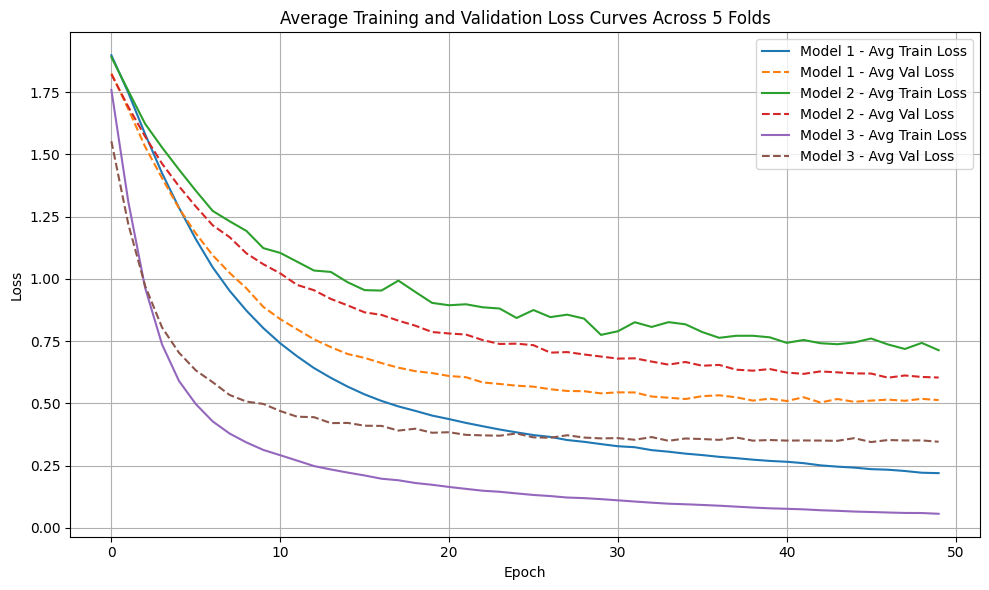

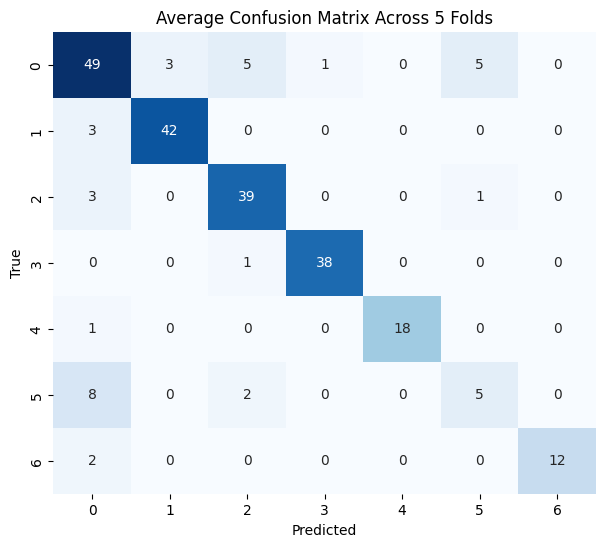

2025-07-09 10:03:43,840 - INFO - Total cross-validation execution time: 138.18 seconds


In [ ]:
total_start_time = time.time()

# Split into training and an unseen test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
logging.info(f"Initial X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
cv_accuracies = []
all_training_times = []
all_prediction_times = []
all_histories = []
all_cms = [] 

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    logging.info(f"Fold {fold + 1}/{kf.get_n_splits()}")

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    scaler_fold = MinMaxScaler()
    X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
    X_val_scaled_fold = scaler_fold.transform(X_val_fold)

    smt_fold = SMOTETomek(random_state=42)
    X_train_resampled_fold, y_train_resampled_fold = smt_fold.fit_resample(X_train_scaled_fold, y_train_fold)
    logging.info(f"Fold {fold + 1} - Resampled train shape: {X_train_resampled_fold.shape}")

    selector_fold = SelectKBest(chi2, k=min(300, X_train_resampled_fold.shape[1])) 
    X_train_selected_fold = selector_fold.fit_transform(X_train_resampled_fold, y_train_resampled_fold)
    selected_features_indices_fold = selector_fold.get_support(indices=True)

    X_val_selected_fold = X_val_scaled_fold[:, selected_features_indices_fold]
    logging.info(f"Fold {fold + 1} - Selected features count: {len(selected_features_indices_fold)}")


    X_train_selected_reshaped_fold = np.expand_dims(X_train_selected_fold, axis=-1)
    X_val_selected_reshaped_fold = np.expand_dims(X_val_selected_fold, axis=-1)


    if X_train_selected_reshaped_fold.shape[1] == 0:
        logging.error(f"Fold {fold + 1}: X_train_selected_reshaped_fold has 0 features after selection. Skipping fold.")
        continue 

    input_shape = (X_train_selected_reshaped_fold.shape[1], 1)
    ecn1_model = create_ecn1(input_shape, num_classes)
    ecn2_model = create_ecn2(input_shape, num_classes)
    ecn3_model = create_ecn3(input_shape, num_classes)

    ecn1_model.compile(optimizer=Adam(learning_rate=learning_rate),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    ecn2_model.compile(optimizer=Adam(learning_rate=learning_rate),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
    ecn3_model.compile(optimizer=Adam(learning_rate=learning_rate),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

    y_train_categorical_fold = np.eye(num_classes)[y_train_resampled_fold]
    y_val_categorical_fold = np.eye(num_classes)[y_val_fold]

    train_start_time = time.time()
    logging.info(f"Fold {fold + 1} - Fitting W-CNN models...")
    history1 = ecn1_model.fit(X_train_selected_reshaped_fold, y_train_categorical_fold,
                       epochs=epochs, batch_size=batch_size, verbose=0,
                       validation_data=(X_val_selected_reshaped_fold, y_val_categorical_fold)) 
    history2 = ecn2_model.fit(X_train_selected_reshaped_fold, y_train_categorical_fold,
                       epochs=epochs, batch_size=batch_size, verbose=0,
                       validation_data=(X_val_selected_reshaped_fold, y_val_categorical_fold))
    history3 = ecn3_model.fit(X_train_selected_reshaped_fold, y_train_categorical_fold,
                       epochs=epochs, batch_size=batch_size, verbose=0,
                       validation_data=(X_val_selected_reshaped_fold, y_val_categorical_fold))

    train_end_time = time.time()
    training_time = train_end_time - train_start_time
    logging.info(f"Fold {fold + 1} - CNN Ensemble trained in {training_time:.2f} seconds.")
    all_training_times.append(training_time)
    
    histories = [history1, history2, history3]
    all_histories.append(histories)
    
    predict_start_time = time.time()
    logging.info(f"Fold {fold + 1} - Predicting with W-CNN models...")
    ecn1_predictions_fold = ecn1_model.predict(X_val_selected_reshaped_fold, verbose=0)
    ecn2_predictions_fold = ecn2_model.predict(X_val_selected_reshaped_fold, verbose=0)
    ecn3_predictions_fold = ecn3_model.predict(X_val_selected_reshaped_fold, verbose=0)

    ensemble_predictions_fold = weighted_ensemble_predictions(
        [ecn1_predictions_fold, ecn2_predictions_fold, ecn3_predictions_fold],
        ensemble_weights)
    
    predict_end_time = time.time()
    prediction_time = predict_end_time - predict_start_time
    logging.info(f"Fold {fold + 1} - CNN Ensemble predicted in {prediction_time:.2f} seconds.")
    all_prediction_times.append(prediction_time)

    accuracy_fold = accuracy_score(y_val_fold, ensemble_predictions_fold)
    cv_accuracies.append(accuracy_fold)
    logging.info(f"Fold {fold + 1} Validation Accuracy: {accuracy_fold:.4f}")

    cm_fold = confusion_matrix(y_val_fold, ensemble_predictions_fold, labels=all_possible_labels)
    all_cms.append(cm_fold)

    del ecn1_model, ecn2_model, ecn3_model
    tf.keras.backend.clear_session()
    gc.collect()

print(f"\nAverage Cross-Validation Accuracy: {np.mean(cv_accuracies):.4f}")
print(f"Average training time: {np.mean(all_training_times):.2f} s")
print(f"Average prediction time: {np.mean(all_prediction_times):.2f} s")


summed_train_loss = {f'model_{i+1}': np.zeros(epochs) for i in range(3)}
summed_val_loss = {f'model_{i+1}': np.zeros(epochs) for i in range(3)}

for fold_histories in all_histories:
    for i, history in enumerate(fold_histories):
        if history is not None: 
            train_loss_data = np.array(history.history['loss'])
            val_loss_data = np.array(history.history['val_loss'])
            
            min_len = min(len(train_loss_data), len(val_loss_data), epochs) 
            
            summed_train_loss[f'model_{i+1}'] += train_loss_data[:min_len]
            summed_val_loss[f'model_{i+1}'] += val_loss_data[:min_len]

num_folds_successful = len(all_histories)
avg_train_loss = {k: v / num_folds_successful for k, v in summed_train_loss.items()}
avg_val_loss = {k: v / num_folds_successful for k, v in summed_val_loss.items()}

# Plot average loss curves
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(avg_train_loss[f'model_{i+1}'], label=f'Model {i+1} - Avg Train Loss')
    plt.plot(avg_val_loss[f'model_{i+1}'], label=f'Model {i+1} - Avg Val Loss', linestyle='--')
    
plt.title(f"Average Training and Validation Loss Curves Across {kf.n_splits} Folds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    
if all_cms: 
    avg_cm = np.sum(all_cms, axis=0)
    
    plt.figure(figsize=(7, 6))
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=all_possible_labels, yticklabels=all_possible_labels, cbar=False)
    plt.title(f"Average Confusion Matrix Across {kf.n_splits} Folds")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
else:
    logging.warning("No confusion matrices collected for plotting.")

total_end_time = time.time()    
total_duration = total_end_time - total_start_time
logging.info(f"Total cross-validation execution time: {total_duration:.2f} seconds")

In [ ]:
start_preprocessing_final = time.time()

scaler_final = MinMaxScaler()
X_train_scaled_final = scaler_final.fit_transform(X_train)
smt_final = SMOTETomek(random_state=42)
X_train_resampled_final, y_train_resampled_final = smt_final.fit_resample(X_train_scaled_final, y_train)
selector_final = SelectKBest(chi2, k=min(300, X_train_resampled_final.shape[1])) 
X_train_selected_final = selector_final.fit_transform(X_train_resampled_final, y_train_resampled_final)
X_train_selected_reshaped_final = np.expand_dims(X_train_selected_final, axis=-1)
logging.info(f"Final training set shape after preprocessing: {X_train_selected_reshaped_final.shape}")


preprocessing_final_duration = time.time() - start_preprocessing_final
print(f"Final training preprocessing took {preprocessing_final_duration:.2f} seconds")

2025-07-09 10:03:44,582 - INFO - Final training set shape after preprocessing: (441, 300, 1)


Final training preprocessing took 0.70 seconds


In [ ]:
X_test_scaled = scaler_final.transform(X_test)
X_test_selected = selector_final.transform(X_test_scaled)
X_test_selected_reshaped = np.expand_dims(X_test_selected, axis=-1)
logging.info(f"Final test set shape after preprocessing: {X_test_selected_reshaped.shape}")

2025-07-09 10:03:44,671 - INFO - Final test set shape after preprocessing: (43, 300, 1)


In [ ]:
# compile models for final training
input_shape_final_model = (X_train_selected_reshaped_final.shape[1], 1) 
ecn1_final_model = create_ecn1(input_shape_final_model, num_classes)
ecn2_final_model = create_ecn2(input_shape_final_model, num_classes)
ecn3_final_model = create_ecn3(input_shape_final_model, num_classes)

ecn1_final_model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
ecn2_final_model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
ecn3_final_model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
y_train_categorical_final = np.eye(num_classes)[y_train_resampled_final]
y_test_categorical_final = np.eye(num_classes)[y_test]

In [ ]:
start_training_final = time.time()
logging.info("Training final W-CNN models...")

ecn1_final_model.fit(X_train_selected_reshaped_final, y_train_categorical_final,
                      epochs=epochs, batch_size=batch_size, verbose=0)
ecn2_final_model.fit(X_train_selected_reshaped_final, y_train_categorical_final,
                      epochs=epochs, batch_size=batch_size, verbose=0)
ecn3_final_model.fit(X_train_selected_reshaped_final, y_train_categorical_final,
                      epochs=epochs, batch_size=batch_size, verbose=0)

training_final_duration = time.time() - start_training_final
print(f"Final model training took {training_final_duration:.2f} seconds")

2025-07-09 10:03:44,800 - INFO - Training final W-CNN models...


Final model training took 17.38 seconds


In [ ]:
start_prediction_final = time.time()
logging.info("Predicting with final W-CNN models on test set...")

ecn1_predictions_test = ecn1_final_model.predict(X_test_selected_reshaped, verbose=0)
ecn2_predictions_test = ecn2_final_model.predict(X_test_selected_reshaped, verbose=0)
ecn3_predictions_test = ecn3_final_model.predict(X_test_selected_reshaped, verbose=0)

ensemble_predictions_test = weighted_ensemble_predictions(
    [ecn1_predictions_test, ecn2_predictions_test, ecn3_predictions_test],
    ensemble_weights)

prediction_final_duration = time.time() - start_prediction_final
print(f"Final model prediction took {prediction_final_duration:.2f} seconds")

2025-07-09 10:04:02,195 - INFO - Predicting with final W-CNN models on test set...


Final model prediction took 0.47 seconds



****** Final Test Set Evaluation ******
Test Set Accuracy: 0.8605
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.89      1.00      0.94         8
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         3

    accuracy                           0.86        43
   macro avg       0.84      0.85      0.84        43
weighted avg       0.86      0.86      0.86        43


Final Test Set Confusion Matrix:
 [[8 0 1 0 0 2 0]
 [0 8 0 0 0 0 0]
 [1 0 7 0 0 0 0]
 [0 0 0 7 0 0 0]
 [0 0 0 0 3 0 0]
 [1 1 0 0 0 1 0]
 [0 0 0 0 0 0 3]]


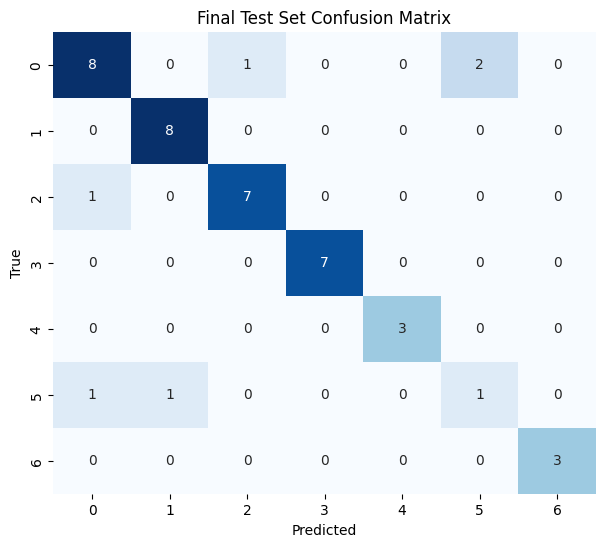

In [ ]:
# Final Evaluation Metrics
accuracy_test = accuracy_score(y_test, ensemble_predictions_test)
report_test = classification_report(y_test, ensemble_predictions_test, labels=all_possible_labels, zero_division=0) 

print("\n****** Final Test Set Evaluation ******")
print(f"Test Set Accuracy: {accuracy_test:.4f}")
print("Test Set Classification Report:\n", report_test)

cm_final_test = confusion_matrix(y_test, ensemble_predictions_test, labels=all_possible_labels)
print("\nFinal Test Set Confusion Matrix:\n", cm_final_test)

# Confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_final_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=all_possible_labels, yticklabels=all_possible_labels, cbar=False)
plt.title("Final Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# %%

print("\n--- Class Distribution in y_train (Original for split) ---")
print(y_train.value_counts())
print("\n--- Class Distribution in y_test (Original held-out) ---")
print(y_test.value_counts())
print("\n--- Class Distribution in y_train_resampled_final (After SMOTETomek for final training) ---")
print(pd.Series(y_train_resampled_final).value_counts())


--- Class Distribution in y_train (Original for split) ---
type
0    63
1    45
2    43
3    39
4    19
5    15
6    14
Name: count, dtype: int64

--- Class Distribution in y_test (Original held-out) ---
type
0    11
2     8
1     8
3     7
5     3
4     3
6     3
Name: count, dtype: int64

--- Class Distribution in y_train_resampled_final (After SMOTETomek for final training) ---
type
3    63
1    63
0    63
2    63
6    63
4    63
5    63
Name: count, dtype: int64


In [ ]:
print("\n--- Inspecting First 20 Predictions on Final Test Set ---")
print("True Labels: ", y_test[:20].tolist())
print("Predicted Labels: ", ensemble_predictions_test[:20].tolist())


--- Inspecting First 20 Predictions on Final Test Set ---
True Labels:  [0, 3, 5, 4, 5, 2, 0, 1, 3, 2, 0, 2, 2, 1, 0, 1, 3, 5, 1, 4]
Predicted Labels:  [0, 3, 5, 4, 0, 0, 0, 1, 3, 2, 5, 2, 2, 1, 0, 1, 3, 1, 1, 4]
